# Visual Computing in the Life Sciences
## Assignment Sheet 2

### Exercise 1 (Producing a Scatterplot Matrix, 25 Points)

In the previous assignment, you wrote a reduced dataset to disk that is limited to the benign and malignant classes and five variables that most strongly distinguish between benign and malignant samples.
This week, you will create and interpret a basic visualization of that data.
In this assignment your final visualization should be a 5 X 5 matrix whose rows and columns are the
measurements of the variables you selected last week. Diagonal cells visualize how the variables are
distributed; off-diagonal cells visualize the relationship between the values of pairs of variables.
Please proceed in the following steps and submit your final script, the final image, and answers to the
questions:


a) Each diagonal cell should contain two overlaid histograms, one for the benign and one for the
malignant class. In the histogram, variable values should be on the x axis, the frequency of
observing that value in each class should be on the y axis. Use different colors to distinguish
between the classes, and add a legend. Your visual design should make it easy to answer the
following questions (5P for implementation, 1P for justifying choice of colors, 3P for answering
questions):

- For which variable(s) you could find a range of values for which the class of the sample is
certain? Write down the ranges.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.lines import Line2D


In [3]:
data=pd.read_excel('reduced_dataset.xlsx')
data.head()
#[(z, [len([x for x in data[z] if x==y]) for y in range(11)]) for z in data.columns]


,thickness,uniCelS,uniCelShape,bareNuc,blaChroma,class
0,5,1,1,1.0,3,2
1,5,4,4,10.0,3,2
2,3,1,1,2.0,3,2
3,6,8,8,4.0,3,2
4,4,1,1,1.0,3,2


In [4]:
benign = data[data['class']==2]
malignant = data[data['class']==4]
[(z, [len([x for x in benign[z] if x==y]) for y in range(11)]) for z in benign.columns]


[('thickness', [0, 142, 46, 96, 68, 85, 16, 1, 4, 0, 0]),
 ('uniCelS', [0, 380, 37, 27, 9, 0, 2, 1, 1, 1, 0]),
 ('uniCelShape', [0, 351, 52, 33, 13, 3, 3, 2, 1, 0, 0]),
 ('bareNuc', [0, 391, 21, 15, 6, 11, 0, 1, 2, 0, 4]),
 ('blaChroma', [0, 150, 159, 129, 8, 4, 1, 7, 0, 0, 0]),
 ('class', [0, 0, 458, 0, 0, 0, 0, 0, 0, 0, 0])]

In [5]:
def draw_histograms(bening, malignant, variables, nrows, ncols):
    fig,axes=plt.subplots(nrows,ncols,sharex=True, figsize=(20,20))
    c=[0,0,'#0000FF', 0, '#FF0000']
    color=[c[x] for x in data['class']]
    #rng = np.random.RandomState(0)
    
    """We couldn't manage to set the size according to the number of overlapping points. There
    always seems to be concentrict circles of the same color, which wouldn't be the case in a 
    proper plot (each slot should have only one circle of each color with the size correspoding
    to its frequency. So we fixed the size and tried to deduce the number of occurances by the color
    intensity. """
    size=120 # fixed at 120
    # size=[x/4 for x in range(800)]  # one per number of 
    # size=[[[(x1+y1)*10 for x1 in range(10)] for y1 in range(10)]] # a different value per row/column

    for i, var in enumerate(variables):
        axes[4,i].set_xlabel(var)
        axes[i,0].set_ylabel(var)
        y = malignant[var]

        for j, var2 in enumerate(variables):
            x = benign[var2]
            
            if j==i:
                axes[i,j].hist(x, bins=20, alpha=0.55, label='Benign',color=c[2])
                axes[i,j].hist(y, bins=20, alpha=0.55, label='Malign',color=c[4])
            else:
                axes[i,j].scatter(data[variables[i]],data[variables[j]], alpha=0.3, color=color, s=size)
        
    fig.text(0.5,0.04,'Variables', ha='center', va='center', fontsize=30)
    fig.text(0.05,0.5,'Frequency', ha='center', va='center', \
                 rotation='vertical',fontsize=30)
    
    hndl = [Line2D([0], [0], marker='.', color=c[2], label='Scatter',markerfacecolor=c[2], markersize=15),\
          Line2D([0], [0], marker='.', color=c[4], label='Scatter',markerfacecolor=c[4], markersize=15)]
    
    fig.legend(handles=hndl,labels=('Bening','Malignant'),loc='upper right',prop={'size': 16})
    plt.show()


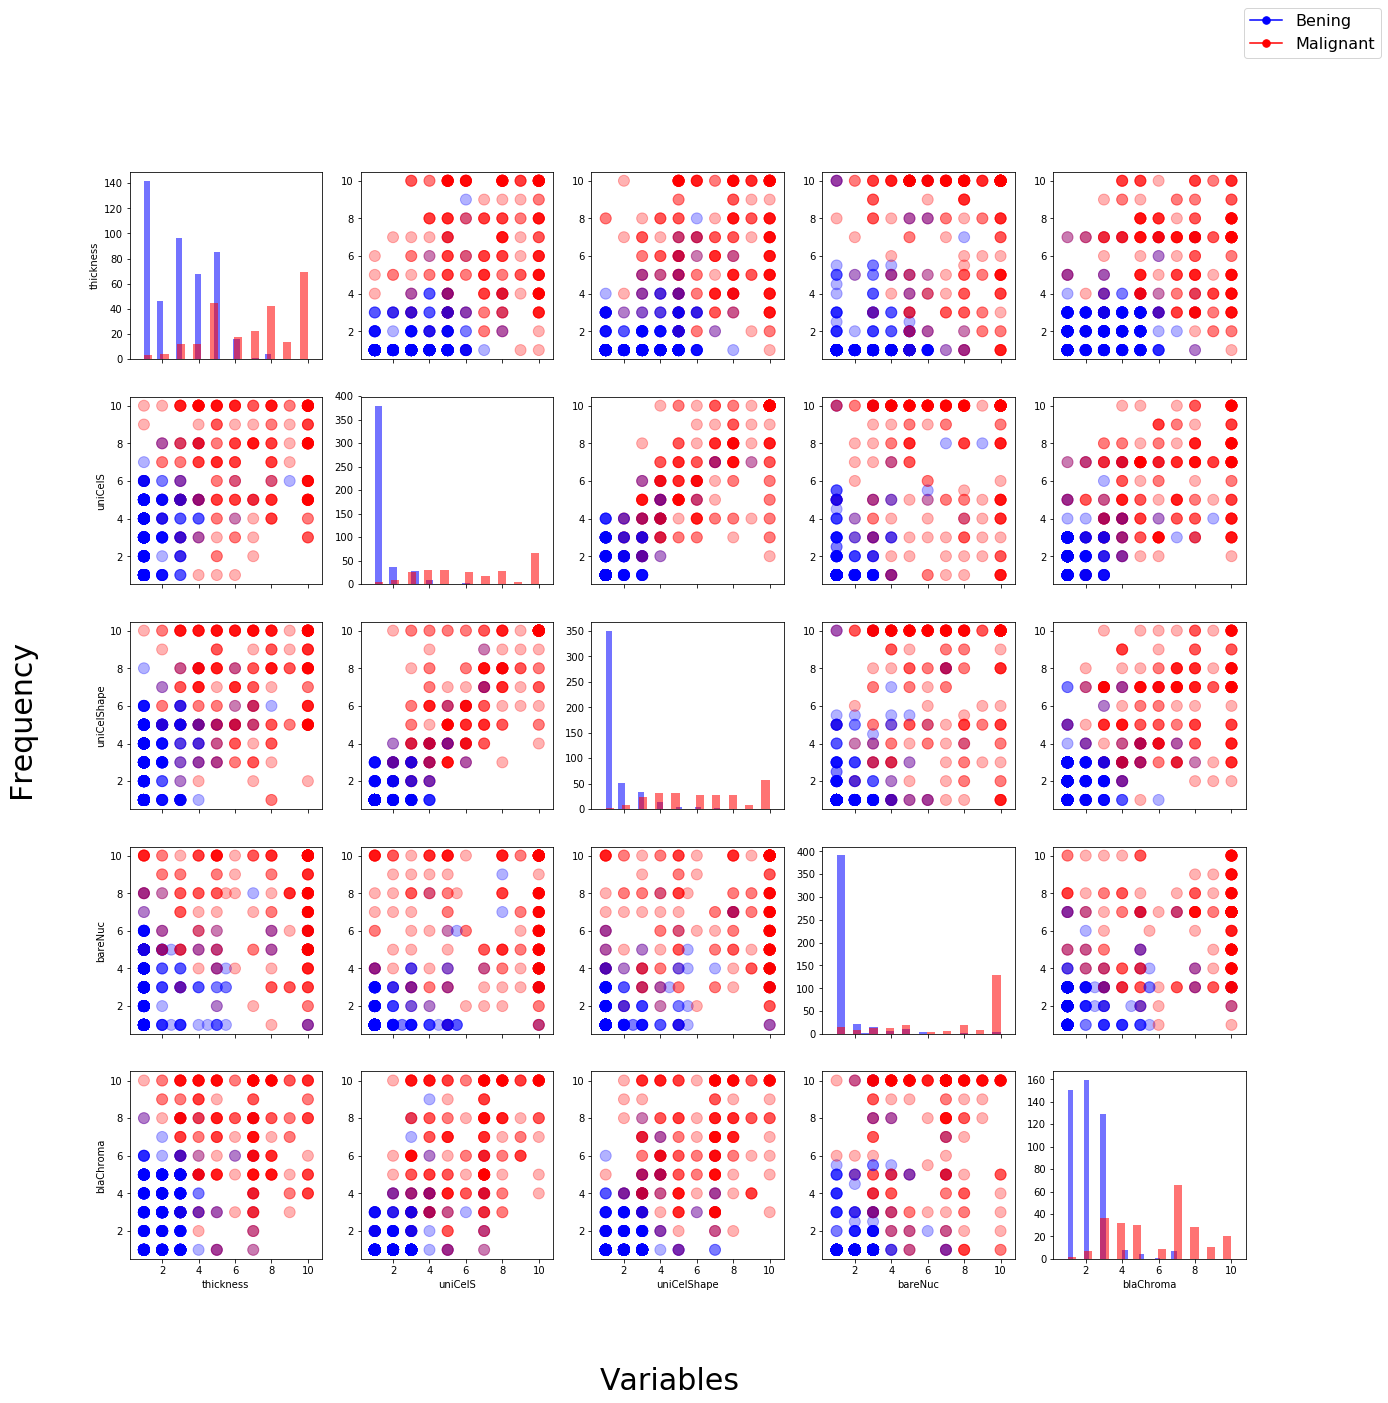

In [6]:
variables=['thickness','uniCelS','uniCelShape','bareNuc','blaChroma']

draw_histograms(benign,malignant,variables,5,5)


- Which variable(s) has(have) almost a uniform distribution for the malignant samples?

From the histograms we can easily see the uniform distribution on the UniCelS, UniCelShape variables.

b) In each non-diagonal cell, display a scatter plot that visualizes the values of the corresponding
pair of variables. Use different colors and opacities so that it is simple to relate these scatter
plots to the density plots on the diagonal, and the size of the marker should reflect the number of
overlapping points. (5P for implementation, 2P for answering questions):


This solution was merged in the function for exercise 1a.


- Point out a pair of variables whose values have a positive correlation overall.

UniCelS and UniCelShape present the points following a diagonal line that indicates a positive correlation between them.

- Can you identify a pair of variables for which the values are highly correlated in one group
of subjects (e.g. malignant), but less so in the other group?


I DONT KNOW!!!!

c) Compute the distance consistency of all scatter plots. Which pair of variables leads to the highest
distance consistency? (6P)

In [7]:
def dist_consist(idata):
    for i in variables:
        for j in variables:
            if i<j:
                acc=0
                # find the centroid(mean) for each cluster
                cb = (benign[i].mean(), benign[j].mean())
                cm = (malignant[i].mean(), malignant[j].mean())
                for v1, v2, c in data.loc[:,[i, j, 'class']].values:
                    # if the point is equidistant to the centroids, count 1
                    if ((((v1-cb[0])**2)+((v2-cb[1])**2))**0.5)==((((v1-cm[0])**2)+((v2-cm[1])**2))**0.5):
                        acc+=1
                    elif (c==2) == \
                    ((((v1-cb[0])**2)+((v2-cb[1])**2))**0.5<(((v1-cm[0])**2)+((v2-cm[1])**2))**0.5):
                        # count how many points are closer to their cluster than to any other
                        # True if class is benign and distance to cb is smaller
                        # or class is not benign and distance to cb is not smaller
                        acc+=1
                print(i, j, 100*acc/len(data.index))
    
dist_consist(data)

thickness uniCelS 93.8483547925608
thickness uniCelShape 94.70672389127324
uniCelS uniCelShape 93.41917024320458
bareNuc thickness 93.2761087267525
bareNuc uniCelS 94.13447782546496
bareNuc uniCelShape 93.41917024320458
bareNuc blaChroma 91.41630901287553
blaChroma thickness 93.41917024320458
blaChroma uniCelS 92.98998569384835
blaChroma uniCelShape 93.2761087267525


uniCelShape thickness have higher values: 94.7

d) Imagine that, given only the values of two variables, you will be asked to decide whether they are
from a benign sample, or a malignant one. Which pair of variables would you choose to make
that decision? Why? (3P)

Hint: You can use the Python toolkit matplotlib to create plots. More information on it is available
from http://matplotlib.org/.

<big> <b>CAMIIIIIIIIIIIIIIII, DO YOU KNOW THIS?</b></big>

I think we should use the variables with higher distance consistency. If we have the value of those two variables (UniCelShape and Thickness), since there is a higher chance that they belong in the cluster whose centroid is closer.

### Exercise 2 (Principal Component Analysis, 25 Points)


It is difficult to fully visualize a very high-dimensional space. In the first assignment sheet and the
previous exercise, we therefore focused on a few variables that we found to be particularly discriminative.
In this exercise, we will instead employ dimensionality reduction on the values of all variables.

a) Perform a Principal Component Analysis (PCA) on the values.
Write a program to read the breast-cancer-wisconsin.xlsx file again. Interpolate missing
values as before, but keep all variables this time.
Make a plot that, for any number n, shows what
fraction of the overall variance in the data is contained in the first n principal components. How
many components do we need to cover 90% of the variance? (5P).

Hint: You may use the implementation of PCA that is provided in the Python package scikit-learn.


[ 0.68850999  0.76162046  0.82255578  0.86711167  0.90611921  0.94074444
  0.96599789  0.98862184  1.        ]


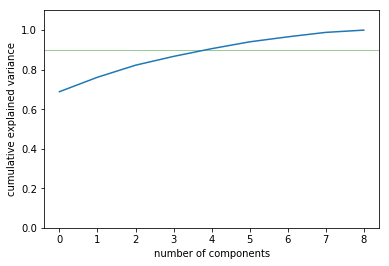

In [31]:
# read the whole data
import pandas as pd
from sklearn.decomposition import PCA
whole = pd.read_excel('breast-cancer-wisconsin.xlsx', 0, \
                     index_row=0, na_values=[''])
whole = whole.interpolate(method='linear')

pca = PCA(n_components=9)
# disconsider the first column (code) and the last (class)
pca.fit(whole.iloc[:,1:10])
#print(.head())
#print(pca.components_)

# CAMIII Explanation to this is in: 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
ratios = np.cumsum(pca.explained_variance_ratio_)
print(ratios)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(ratios)
plt.axes().set_ylim(0, 1.1)
plt.axhspan(0.895,0.9, facecolor='g', alpha=0.4)
plt.show()

We need at least 5 variables to get more than 90% of the explanation for the variance.

b) Each sample is now characterized by a point in PCA space. Create a scatter plot matrix (in the
same manner as in the previous sheet) that shows the first five principal components. This time,
instead of histograms, each diagonal cell should contain two overlaid density plots, one for the
benign and one for the malignant class. In the density plot, variable values should be on the x
axis, the frequency of observing that value in each class should be on the y axis. Use different
colors to distinguish between the classes, and add a legend. (5P)

In [43]:
pca1 = PCA(5)
pca1.fit(whole)
#benign_proj = pca.fit_transform(whole[whole['class']==2])
#malign_proj = pca.fit_transform(whole[whole['class']==4])
projected = pca1.fit_transform(whole)
#print(projected[:,0])
#bara=[0,0,'#0000FF', 0, '#FF0000']
#print([bara[x] for x in data['class']])


def draw_densities(proj1, dt):
    ncols = nrows = len(proj1[0])
    fig,axes=plt.subplots(nrows,ncols,sharex=False, figsize=(20,20))
    c=[0,0,'#0000FF', 0, '#FF0000']
    color=[c[x] for x in dt['class']]
    #rng = np.random.RandomState(0)
    
    """We couldn't manage to set the size according to the number of overlapping points. There
    always seems to be concentrict circles of the same color, which wouldn't be the case in a 
    proper plot (each slot should have only one circle of each color with the size correspoding
    to its frequency. So we fixed the size and tried to deduce the number of occurances by the color
    intensity. """
    size=20 # 120#[x/4 for x in range(800)]#[[[x1*y1*10 for x1 in range(11)] for y1 in range(11)]])#120

    for i in range(nrows):
        axes[4,i].set_xlabel('Component '+str(i+1))
        axes[i,0].set_ylabel('Component '+str(i+1))
        #y = proj1[i]

        for j in range(ncols):
            #x = proj1[j]
            
            if j==i:
                axes[i,j].hist(proj1[dt['class']==2,i],\
                               bins=120, 
                               alpha=0.55, label='Benign',color=c[2])
                axes[i,j].hist(proj1[dt['class']==4,j],\
                               bins=120, 
                               alpha=0.55, label='Malign',color=c[4])
            else:
                axes[i,j].scatter(proj1[:,j],proj1[:,i], alpha=0.3, color=color, s=size)
        
    fig.text(0.5,0.04,'Variables', ha='center', va='center', fontsize=30)
    fig.text(0.05,0.5,'Frequency', ha='center', va='center', \
                 rotation='vertical',fontsize=30)
    
    hndl = [Line2D([0], [0], marker='.', color=c[2], label='Scatter',markerfacecolor=c[2], markersize=15),\
          Line2D([0], [0], marker='.', color=c[4], label='Scatter',markerfacecolor=c[4], markersize=15)]
    
    fig.legend(handles=hndl,labels=('Bening','Malignant'),loc='upper right',prop={'size': 16})
    plt.show()


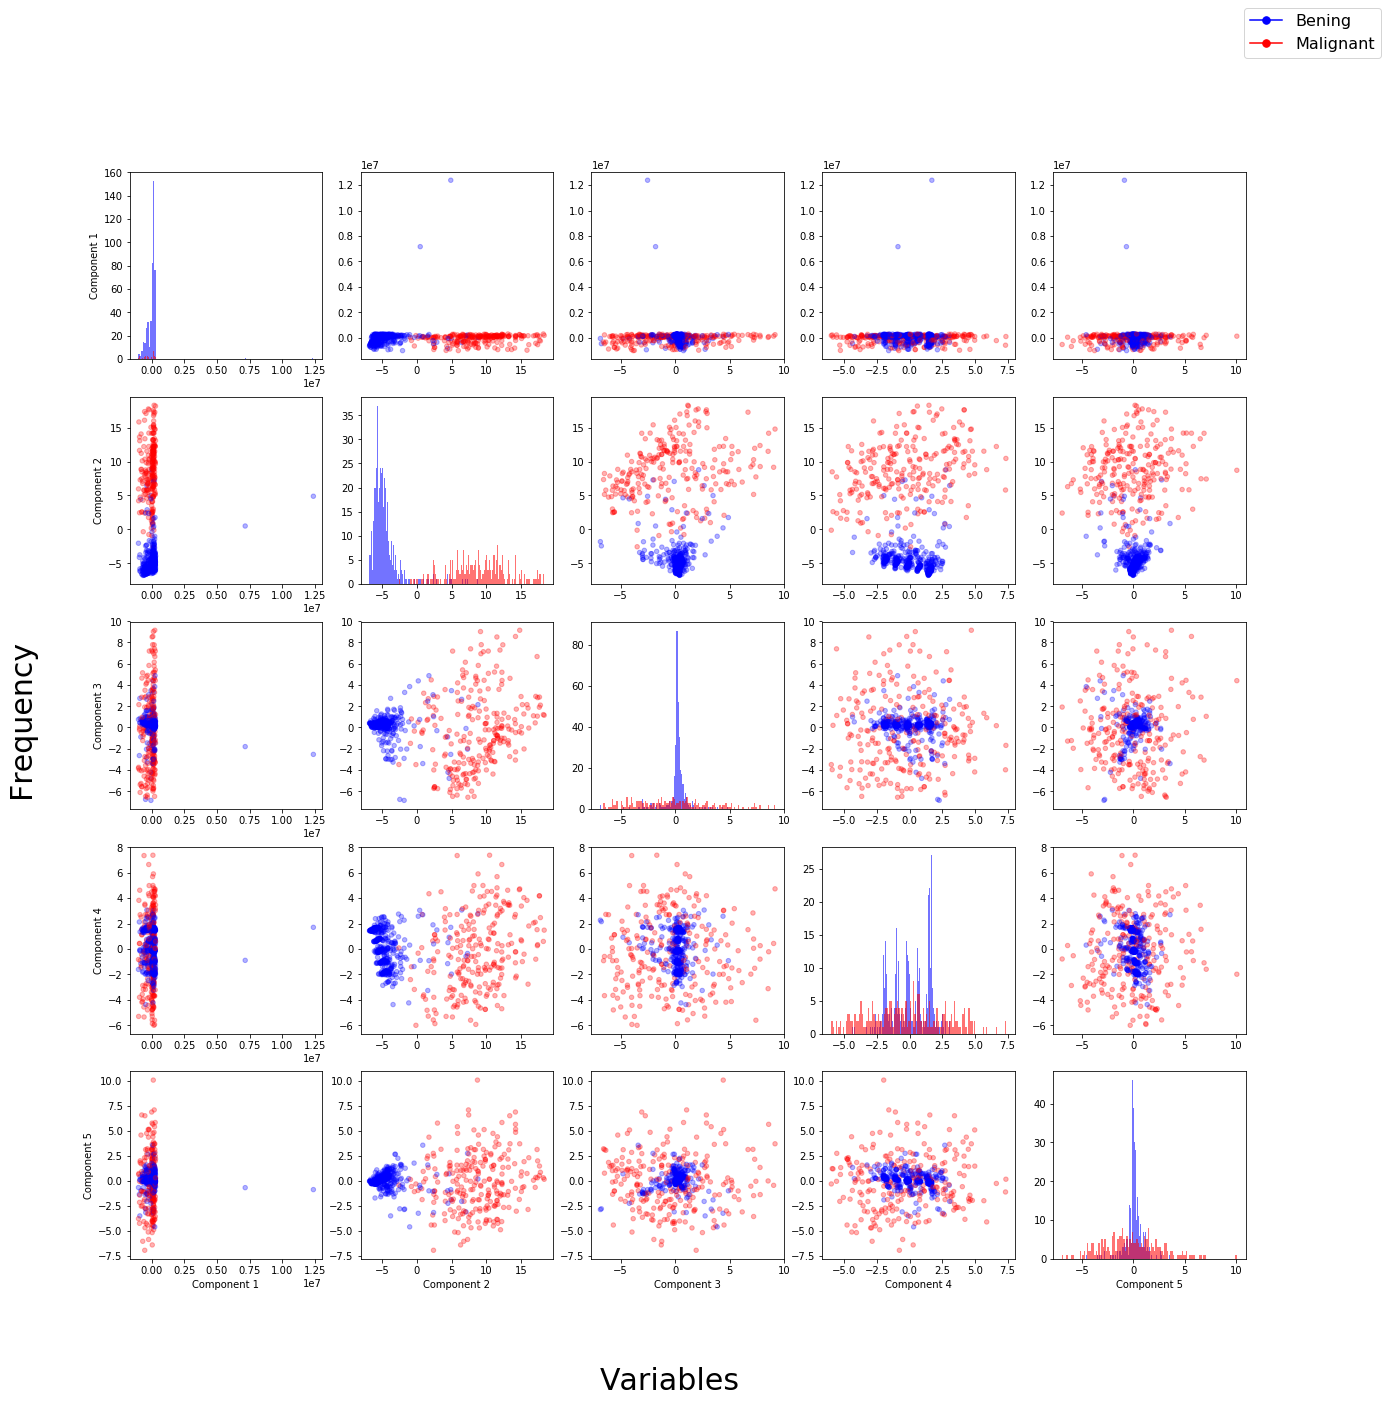

In [44]:
draw_densities(projected, whole)


c) In which PCA modes do you see a clear difference between the benign samples and the malignant
samples, in which modes the difference is less? (3P)

d) Sometimes outliers (points that are quite far away from the rest of the data) could affect the data
analysis. Provide the sample-Code or row index of the furthest point of malignant samples in the
fourth PCA mode. Then remove that sample using its row index. (5P)

In [41]:
"""We can see that the malignant outliers have values bigger than 8 from the graph.
We can remove using the boolean slicing.
Apparently there are 2 benign outliers on the 1st component. We removed them as well, even
when it wasn't mentioned in the exercise."""
whole_no_outliers = whole.iloc[projected[:,0]<0.6e+7,:]
projected_no_outliers = projected[projected[:,0]<0.6e+7,:]
whole_no_outliers = whole_no_outliers.iloc[projected_no_outliers[:,4]<8,:]
projected_no_outliers = projected_no_outliers[projected_no_outliers[:,4]<8,:]

#whole.iloc[projected[:,0]>0.6e+7,:]
#whole_no_outliers.iloc[projected_no_outliers[:,4]>8,:]


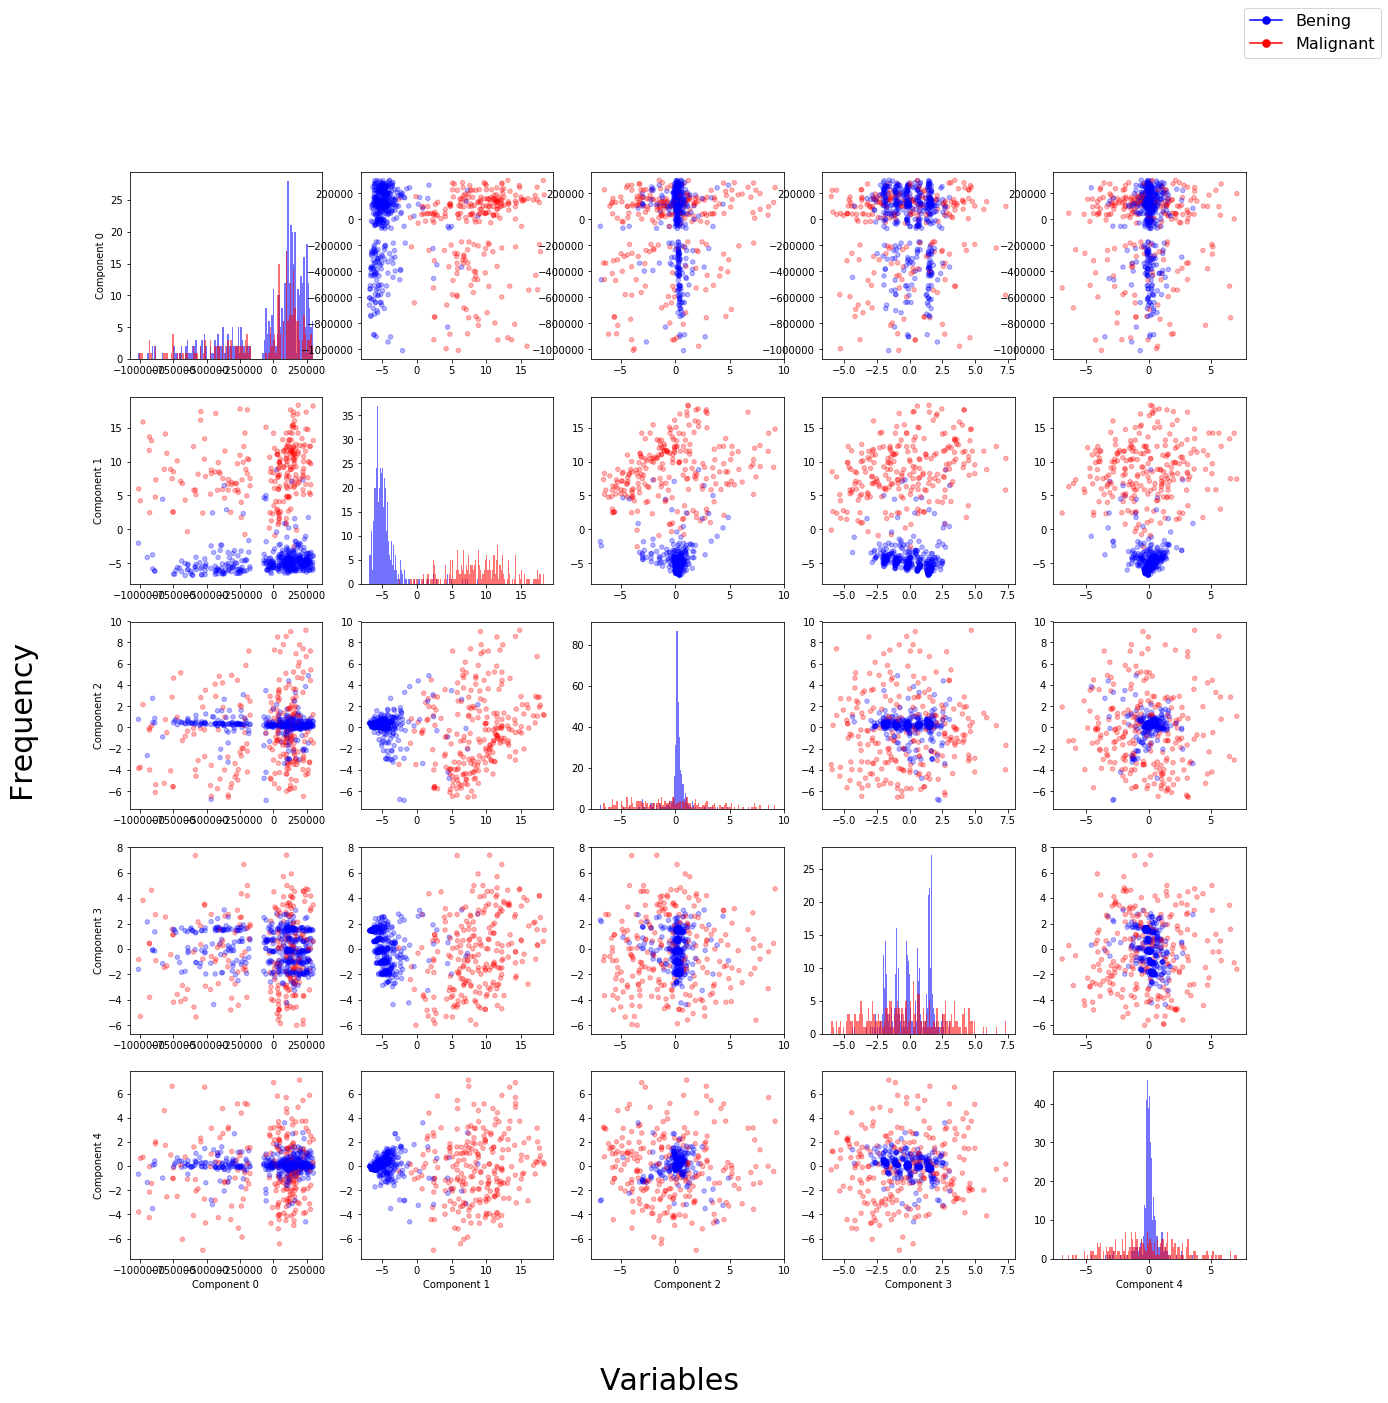

In [42]:
draw_densities(projected_no_outliers, whole_no_outliers)

e) See what happens when we re-weight the variables to emphasize those that discriminate well
between the benign and malignant classes. To do so, compute F scores (cf. sheet 2, task 1 d))
and multiply each data value by its corresponding F score. Create two scatter plots to compare
PCA results with and without the re-weighting. (5P)

f) In the breast cancer data-set, all the variables have a similar range of values v 2 [1; 10]. If the
variables of a data-set have varying ranges, for example one variable have values around 1000 to
2000 and another around 1 to 5, how could this affect the PCA performance. Explain how would
you solve this problem? (2P)